<a href="https://colab.research.google.com/github/simrran-sharma/MSC-IT-PART1-SEM1/blob/main/FDS/Practical_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory data analysis

Exploratory Data Analysis – EDA – plays a critical role in understanding the what, why, and how of the problem statement. It’s first in the order of operations that a data analyst will perform when handed a new data source and problem statement.

Exploratory data analysis (EDA) is a very important step which takes place after feature engineering and acquiring data and it should be done before any modeling. This is because it is very important for a data scientist to be able to understand the nature of the data without making assumptions.

The purpose of EDA is to use summary statistics and visualizations to better understand data, and find clues about the tendencies of the data, its quality and to formulate assumptions and the hypothesis of our analysis.

**Categorical Variables**

Categorical variables can also be nominal or ordinal. Nominal data has no intrinsic ordering to the categories. For example gender (Male, Female, Other) has no specific ordering. Ordinal data as clear ordering such as three settings on a toaster (high medium and low). A frequency table (count of each category) is the common statistic for describing categorical data of each variable, and a bar chart or a waffle chart (shown below) are two visualizations which can be used.

**Numeric Variables**

Numeric or continuous variables can be any value within a finite or infinite interval. There are two types of numeric variables that is interval and ratios. Interval variables have numeric scales and the same interpretation throughout the scale, but do not have an absolute zero.

“The ratio scale of measurement is the most informative scale. It is an interval scale with the additional property that its zero position indicates the absence of the quantity being measured. You can think of a ratio scale as the three earlier scales rolled up in one. Like a nominal scale, it provides a name or category for each object (the numbers serve as labels). Like an ordinal scale, the objects are ordered (in terms of the ordering of the numbers). Like an interval scale, the same difference at two places on the scale has the same meaning.

**Code to load in the Titanic dataset**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns
df = pd.read_csv("https://raw.githubusercontent.com/pratikrr/Visualization/main/titanic.csv")

# PassengerId is a dataset artifact, not something useful for analysis
df.drop("PassengerId", axis=1, inplace=True)

# We want to use Age as one of the main examples, drop rows that are missing Age values
df.dropna(subset=["Age"], inplace=True)

# Numeric vs. Categorical EDA

plotting Age (a numeric value) against the target Survived (a categorical value).

**Multiple Histograms**

Rather than using the y-axis to represent the two categories, let’s use two different colors. That means that we can use the y-axis to represent counts rather than trying to discern this information from the density of dots.

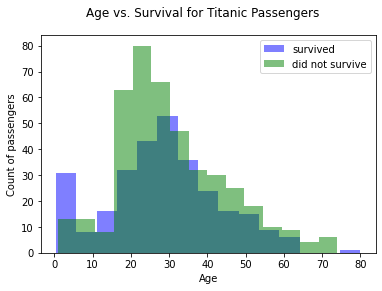

In [ ]:
fig, ax = plt.subplots()

ax.hist(df[df["Survived"]==1]["Age"], bins=15, alpha=0.5, color="blue", label="survived")
ax.hist(df[df["Survived"]==0]["Age"], bins=15, alpha=0.5, color="green", label="did not survive")

ax.set_xlabel("Age")
ax.set_ylabel("Count of passengers")

fig.suptitle("Age vs. Survival for Titanic Passengers")

ax.legend();

**Multiple Density Estimate Plots**

This is showing largely the same information as the histograms, except that it’s a density estimate (estimate of the probability density function) rather than a count across bins. 

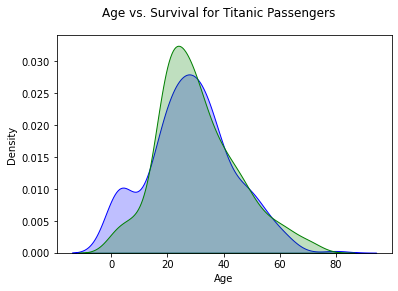

In [ ]:
fig, ax = plt.subplots()

sns.kdeplot(df[df["Survived"]==1]["Age"], shade=True, color="blue", label="survived", ax=ax)
sns.kdeplot(df[df["Survived"]==0]["Age"], shade=True, color="green", label="did not survive", ax=ax)

ax.set_xlabel("Age")
ax.set_ylabel("Density")

fig.suptitle("Age vs. Survival for Titanic Passengers");

# Categorical vs. Categorical EDA
Plotting Pclass (a categorical value) against the target Survived (a categorical value).

**Stacked Bar Charts**

These can be used for counts but if you use percentages rather than counts, they show proportions.
This requires a bit of dataframe manipulation to prepare for plotting:

In [ ]:
# Create a dataframe with the counts by passenger class and survival
# ["Name"] could be any column within the data; it is the equivalent
# of COUNT(id) in SQL
counts_df = df.groupby(["Pclass", "Survived"])["Name"].count().unstack()

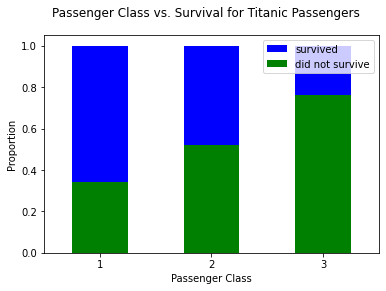

In [ ]:
# Transpose so survived + did not survive add up to 1, divide by the total number (transposed), then transpose one more time for plotting
survived_percents_df = counts_df.T.div(counts_df.T.sum()).T
fig, ax = plt.subplots()

survived_percents_df.plot(kind="bar", stacked=True, color=["green", "blue"], ax=ax)

ax.set_xlabel("Passenger Class")
ax.set_xticklabels([1, 2, 3], rotation=0)
ax.set_ylabel("Proportion")

color_patches = [
    Patch(facecolor="blue", label="survived"),
    Patch(facecolor="green", label="did not survive")
]
ax.legend(handles=color_patches)

fig.suptitle("Passenger Class vs. Survival for Titanic Passengers");

# Numeric vs. Numeric vs. Categorical EDA

Sometimes it’s interesting to see the relationship between two different numeric features and the target, not just one at a time. Plotting Age (a numeric feature) vs. Fare (a numeric feature) vs. Survived (a categorical target).

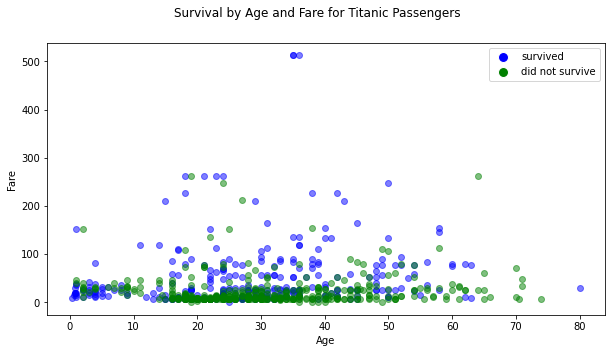

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(df[df["Survived"]==1]["Age"], df[df["Survived"]==1]["Fare"], c="blue", alpha=0.5)
ax.scatter(df[df["Survived"]==0]["Age"], df[df["Survived"]==0]["Fare"], c="green", alpha=0.5)

ax.set_xlabel("Age")
ax.set_ylabel("Fare")

color_patches = [
    Line2D([0], [0], marker='o', color='w', label='survived', markerfacecolor='b', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='did not survive', markerfacecolor='g', markersize=10)
]
ax.legend(handles=color_patches)

fig.suptitle("Survival by Age and Fare for Titanic Passengers");

Example 2 : Two Categorical Variables with different dataset

In [ ]:
lc_loans = pd.read_csv('https://raw.githubusercontent.com/pratikrr/Visualization/main/LC_LOANS_CSV.csv')
crosstab = lc_loans.pivot_table(index='grade', columns='status', aggfunc=lambda x: len(x), margins=True)
print(crosstab)

df = crosstab.copy().loc['A':'G',:]
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All'] / sum(df['All'])
perc_crosstab = df
print(perc_crosstab)

status  Charged Off  Current  Fully Paid  Late     All
grade                                                 
A              1562    50051       20408   469   72490
B              5302    93852       31160  2056  132370
C              6023    88928       23147  2777  120875
D              5007    53281       13681  2308   74277
E              2842    24639        5949  1374   34804
F              1526     8444        2328   606   12904
G               409     1990         643   199    3241
All           22671   321185       97316  9789  450961
status  Charged Off   Current  Fully Paid      Late       All
grade                                                        
A          0.021548  0.690454    0.281528  0.006470  0.160746
B          0.040054  0.709013    0.235401  0.015532  0.293529
C          0.049828  0.735702    0.191495  0.022974  0.268039
D          0.067410  0.717328    0.184189  0.031073  0.164708
E          0.081657  0.707936    0.170929  0.039478  0.077177
F          0.118